In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Data exploration

## Stratified sampling?

In [2]:
train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv",index_col='Id')
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv",index_col='Id')
y_best = pd.read_csv("../input/house-prices-advanced-regression-techniques/result-with-best.csv",index_col='Id')

sample_submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
with open('../input/house-prices-advanced-regression-techniques/data_description.txt') as f:
    data_description = f.readlines()

In [3]:
# train.to_csv('train.csv', index=False)
# test.to_csv('test.csv', index=False)

# sample_submission.to_csv('sample_submission.csv', index=False)

# textfile = open("data_description.txt", "w")
# for element in data_description:
#     textfile.write(element + "\n")
# textfile.close()

In [4]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [7]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [9]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure attribute_histogram_plots


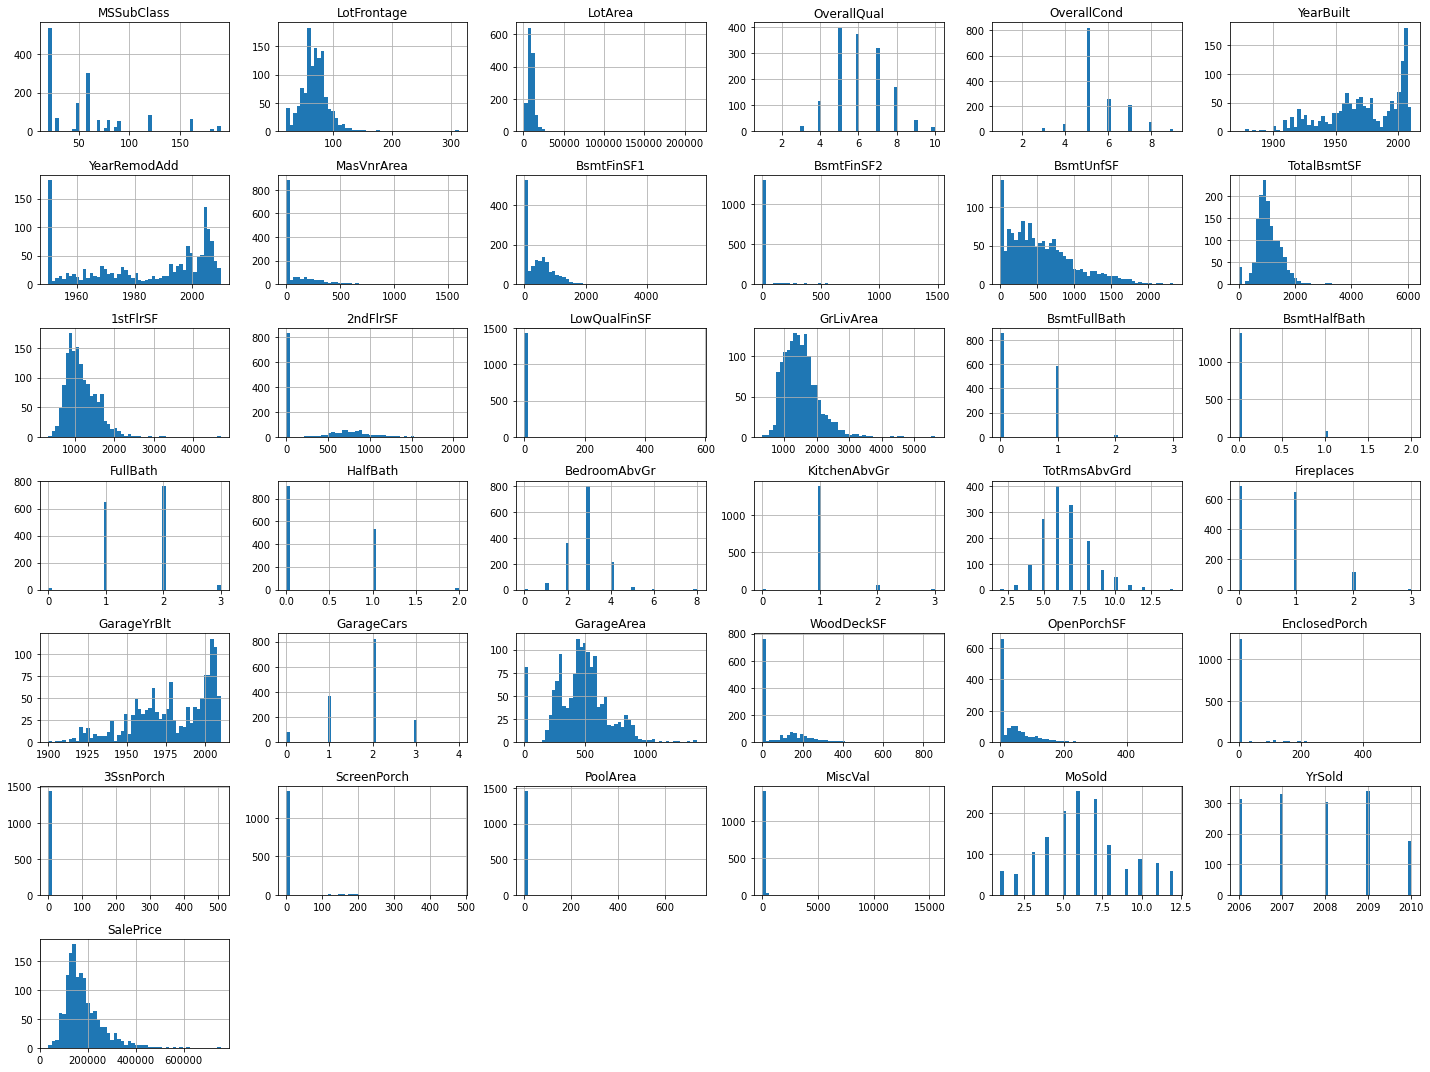

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

No handles with labels found to put in legend.


Saving figure housing_prices_scatterplot


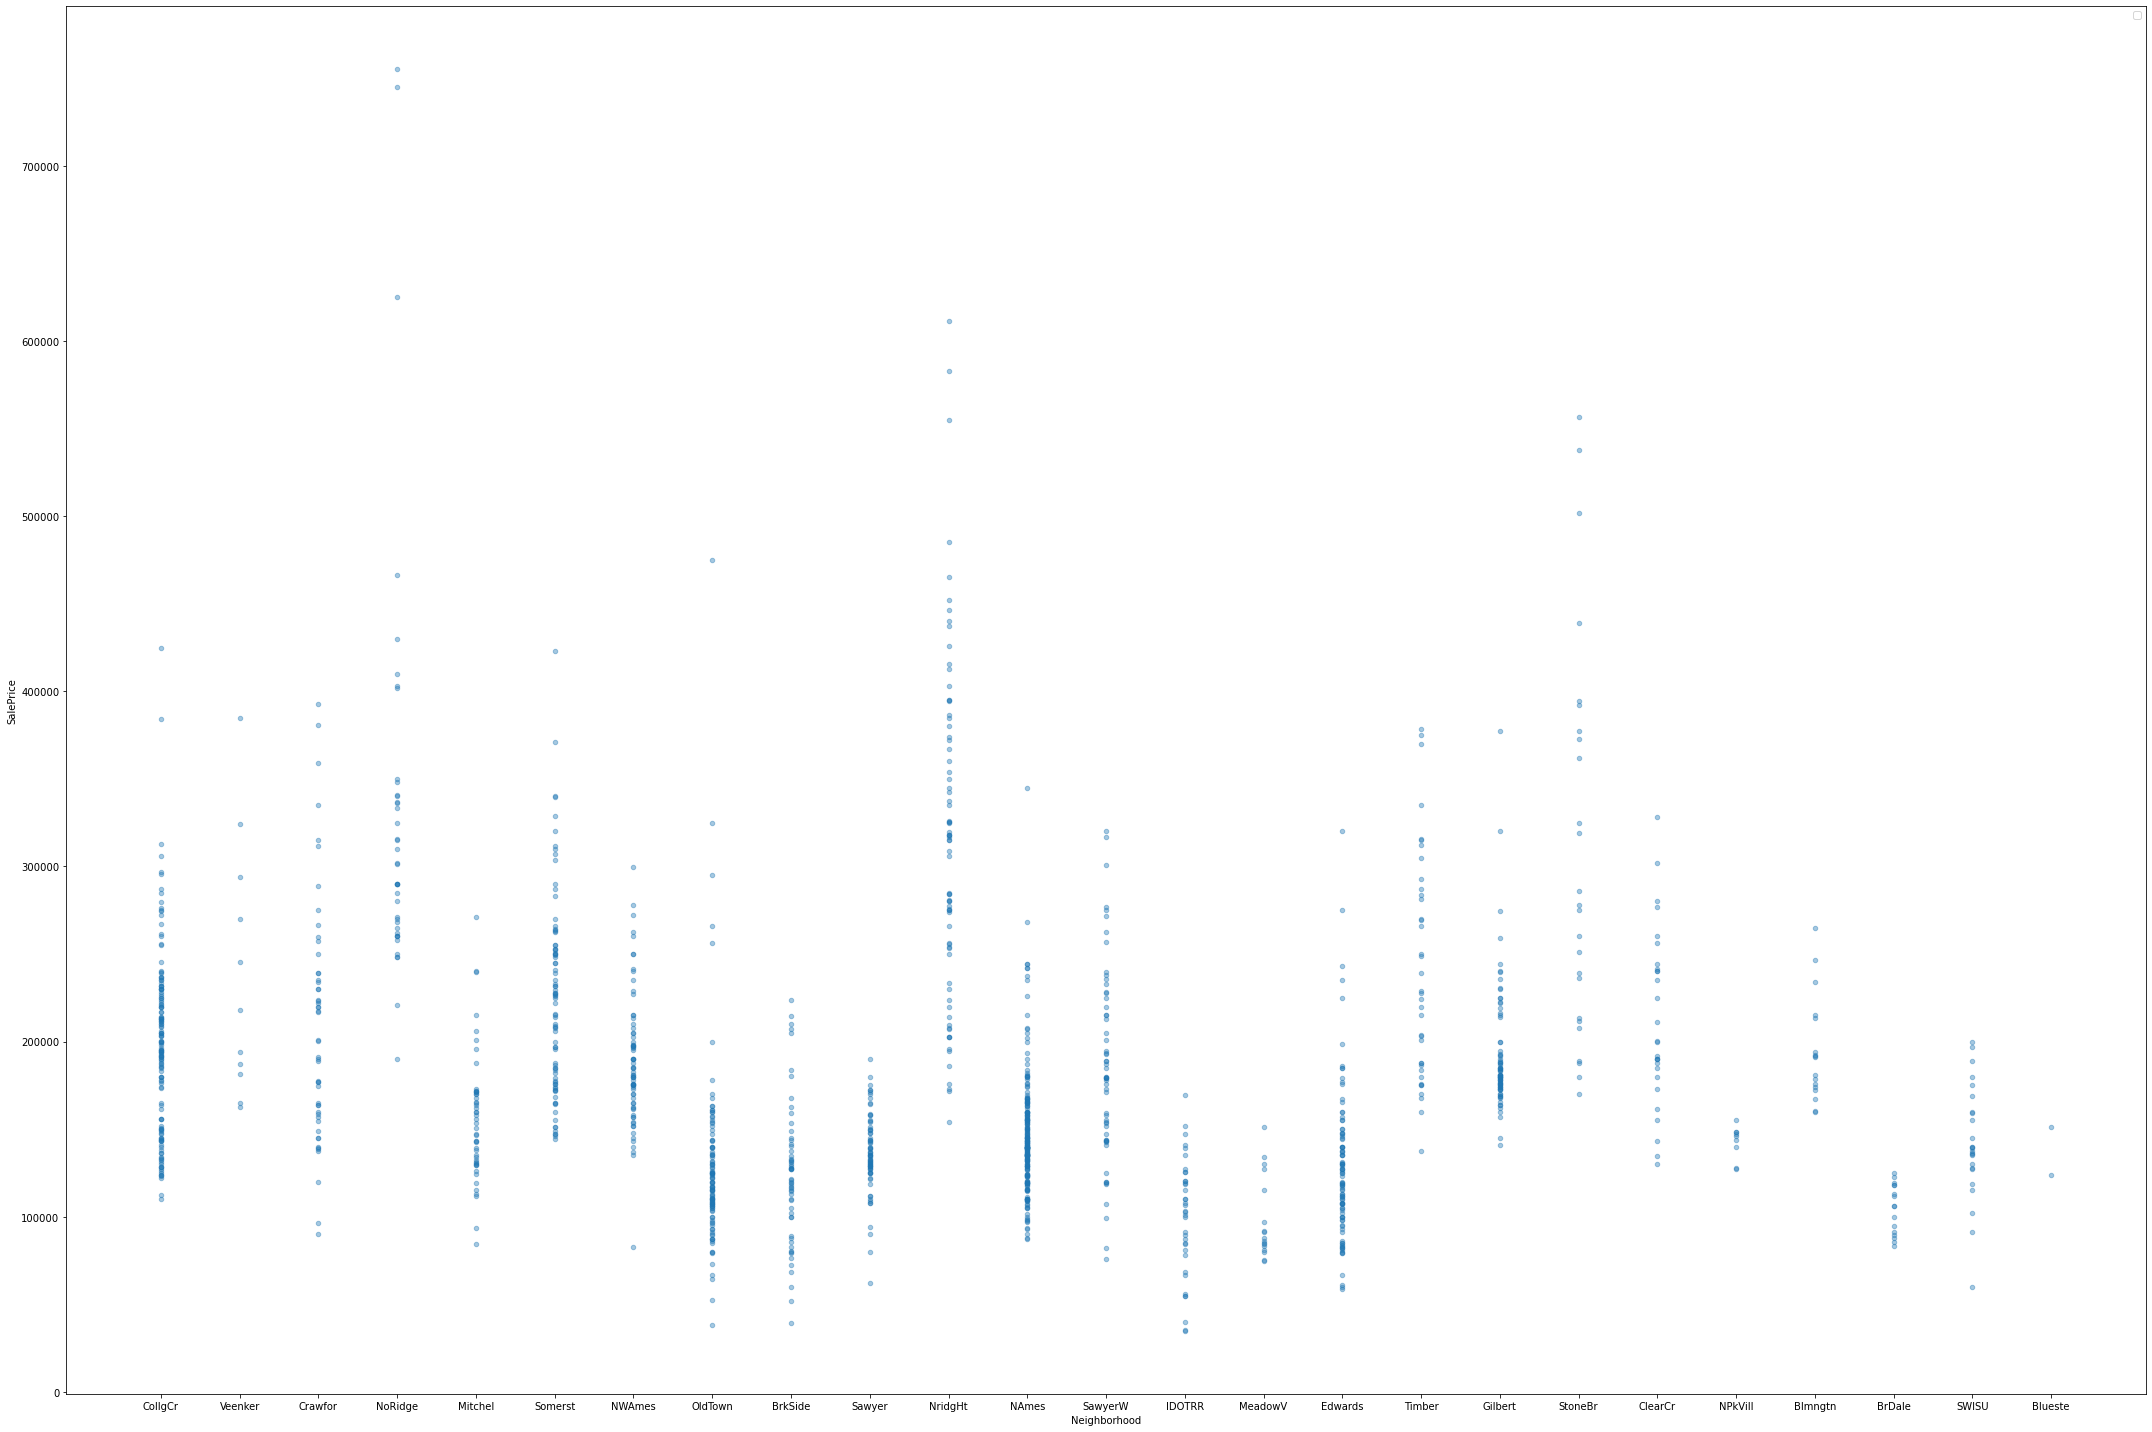

In [11]:
train.plot(kind="scatter", figsize=(30,20), x="Neighborhood", y="SalePrice", alpha=0.4)
plt.legend()
save_fig("housing_prices_scatterplot")

In [12]:
corr_matrix = train.corr()

In [13]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Saving figure scatter_matrix_plot


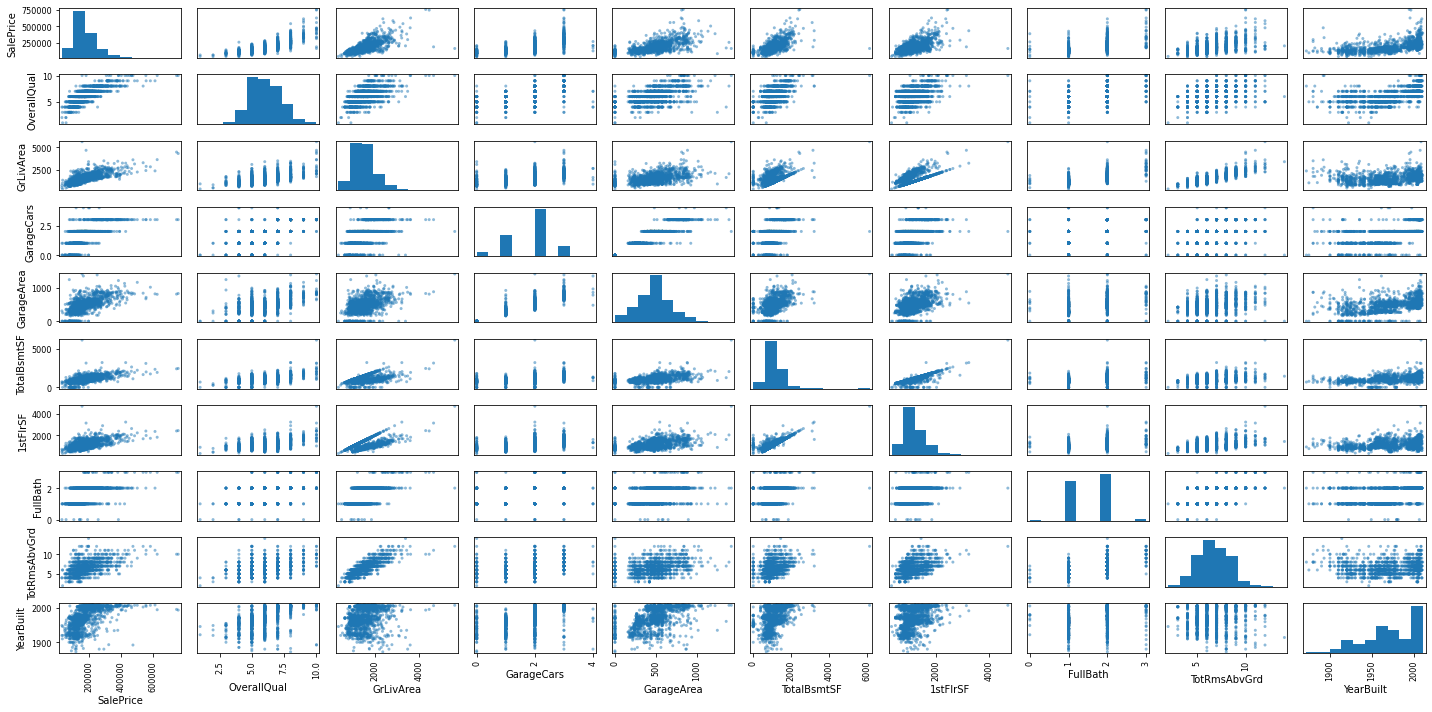

In [14]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea",
              "GarageCars", "GarageArea", "TotalBsmtSF",
              "1stFlrSF", "FullBath","TotRmsAbvGrd", "YearBuilt"]
scatter_matrix(train[attributes], figsize=(20, 10))
save_fig("scatter_matrix_plot")

# Dataset split

In [15]:
housing_tr = train.copy()

In [16]:
housing_tr.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
housing_labels = housing_tr["SalePrice"].copy()
housing_tr = housing_tr.drop("SalePrice", axis=1) # drop labels for training set


## NA check

In [18]:
sample_incomplete_rows = housing_tr[housing_tr.isnull().any(axis=1)]
sample_incomplete_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [19]:
housing_num = housing_tr.select_dtypes(include=[np.number])

In [20]:
housing_cat = housing_tr.select_dtypes(include=['object'])

In [21]:
housing_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [22]:
housing_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [23]:
housing_cat.columns.values

array(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'], dtype=object)

In [24]:
list(housing_cat)

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

# Transformation Pipelines

In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [26]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [27]:
imputer.statistics_

array([5.0000e+01, 6.9000e+01, 9.4785e+03, 6.0000e+00, 5.0000e+00,
       1.9730e+03, 1.9940e+03, 0.0000e+00, 3.8350e+02, 0.0000e+00,
       4.7750e+02, 9.9150e+02, 1.0870e+03, 0.0000e+00, 0.0000e+00,
       1.4640e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
       3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00, 1.9800e+03,
       2.0000e+00, 4.8000e+02, 0.0000e+00, 2.5000e+01, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00,
       2.0080e+03])

In [28]:
housing_num.median().values

array([5.0000e+01, 6.9000e+01, 9.4785e+03, 6.0000e+00, 5.0000e+00,
       1.9730e+03, 1.9940e+03, 0.0000e+00, 3.8350e+02, 0.0000e+00,
       4.7750e+02, 9.9150e+02, 1.0870e+03, 0.0000e+00, 0.0000e+00,
       1.4640e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
       3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00, 1.9800e+03,
       2.0000e+00, 4.8000e+02, 0.0000e+00, 2.5000e+01, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00,
       2.0080e+03])

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [30]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="constant")),
        ('encoder', OneHotEncoder(handle_unknown='ignore')),
#         ('std_scaler', StandardScaler()),
    ])
housing_cat_tr = cat_pipeline.fit_transform(housing_cat)

In [31]:
housing_cat_tr

<1460x268 sparse matrix of type '<class 'numpy.float64'>'
	with 62780 stored elements in Compressed Sparse Row format>

In [32]:

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

full_pipeline = ColumnTransformer(transformers=[
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
#         ("cat2", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing_tr)

In [33]:
pd.DataFrame(housing_prepared).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1460 non-null   object
dtypes: object(1)
memory usage: 11.5+ KB


# Select and Train a Model

Linear regression baseline

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [35]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing_tr.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [208592.43910013 205670.25799924 205607.09888672 164854.06863448
 292190.93359155]


In [36]:
print("Labels:", list(some_labels))

Labels: [208500, 181500, 223500, 140000, 250000]


In [37]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

20515.029049723635

In [38]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

13226.577167263806

## DecisionTreeRegressor

In [39]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [40]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [41]:
len(housing_predictions)

1460

## GradientBoostingClassifier

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, random_state=42,
        ).fit(housing_prepared, housing_labels)

In [43]:
housing_predictions = reg.predict(housing_prepared)
gradient_mse = mean_squared_error(housing_labels, housing_predictions)
gradient_rmse = np.sqrt(gradient_mse)
gradient_rmse

20555.923166460943

## XGBoost

In [44]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective = "reg:squarederror", max_depth=2, n_estimators=500, seed=0, booster = "dart", rate_drop = 0.1,
         skip_drop = 0.5).fit(housing_prepared, housing_labels)

In [45]:
housing_predictions = xgb.predict(housing_prepared)
xgb_mse = mean_squared_error(housing_labels, housing_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse


11089.883644649299

### Full pipeline

In [46]:
housing_eval = test.copy()
t_results = []


In [123]:
# xgb = XGBRegressor(objective = "reg:squarederror", max_depth=3, n_estimators=567, learning_rate=0.05, seed=42,
#         booster = "dart", tree_method = "approx",
#         rate_drop = 0.1, skip_drop = 0.5)
xgb = XGBRegressor(objective='reg:squarederror', eval_metric='rmse',
                   max_depth=6, n_estimators=540, learning_rate=0.03,
                   min_child_weight=4, colsample_bytree=0.3110051531508959, subsample=0.5177873744212868,
                   reg_alpha=0.004012583121401927, reg_lambda=0.04358194707815684,
                   )


In [120]:
full_eval_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("final_model", xgb)
    ])

# Training
full_eval_pipeline_with_predictor.fit(housing_tr, housing_labels)
# Testing
y_eval = full_eval_pipeline_with_predictor.predict(housing_eval)

In [121]:
y_eval

array([123929.875, 159847.33 , 183261.7  , ..., 180319.02 , 116248.82 ,
       224444.75 ], dtype=float32)

In [50]:
y_best

,SalePrice
Id,
1461,105000.0
1462,172000.0
1463,189900.0
1464,195500.0
1465,191500.0
...,...
2915,90500.0
2916,71000.0
2917,131000.0


In [122]:
from sklearn.metrics import mean_squared_log_error
t0mse = mean_squared_log_error(y_best, y_eval)
t_results.append(np.sqrt(t0mse))
t_results

[0.13360713391631465, 0.12514647615637278]

In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=600),
        'max_depth': randint(low=1, high=12),
    }

rnd_xgb_reg = XGBRegressor(objective = "reg:squarederror", seed=42, booster = "dart", rate_drop = 0.1,
         skip_drop = 0.5)
rnd_xgb_search = RandomizedSearchCV(rnd_xgb_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_xgb_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster='dart',
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraint...
                                          reg_lambda=None,
                                          scale_pos_weight=None, seed=42,
                                          skip_drop=0.5, s

In [53]:
cvres = rnd_xgb_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

29538.736568946777 {'max_depth': 7, 'n_estimators': 436}
30217.562575140488 {'max_depth': 11, 'n_estimators': 72}
28561.792001745518 {'max_depth': 5, 'n_estimators': 122}
28205.732256210176 {'max_depth': 3, 'n_estimators': 215}
29912.73011870529 {'max_depth': 11, 'n_estimators': 459}
29708.086555977912 {'max_depth': 8, 'n_estimators': 373}
27945.632865341075 {'max_depth': 4, 'n_estimators': 131}
28950.817558464198 {'max_depth': 6, 'n_estimators': 309}
28423.479911304094 {'max_depth': 2, 'n_estimators': 344}
28970.8281692971 {'max_depth': 6, 'n_estimators': 386}


In [54]:
rnd_xgb_search.best_params_

{'max_depth': 4, 'n_estimators': 131}

In [55]:
eval_rnd_results = []
cvres = rnd_xgb_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    eval_rnd_results.append({'score': np.sqrt(-mean_score), 'params': params})

In [56]:
sort_results = sorted(eval_rnd_results, key=lambda x: x['score'])
sort_results

[{'score': 27945.632865341075,
  'params': {'max_depth': 4, 'n_estimators': 131}},
 {'score': 28205.732256210176,
  'params': {'max_depth': 3, 'n_estimators': 215}},
 {'score': 28423.479911304094,
  'params': {'max_depth': 2, 'n_estimators': 344}},
 {'score': 28561.792001745518,
  'params': {'max_depth': 5, 'n_estimators': 122}},
 {'score': 28950.817558464198,
  'params': {'max_depth': 6, 'n_estimators': 309}},
 {'score': 28970.8281692971, 'params': {'max_depth': 6, 'n_estimators': 386}},
 {'score': 29538.736568946777,
  'params': {'max_depth': 7, 'n_estimators': 436}},
 {'score': 29708.086555977912,
  'params': {'max_depth': 8, 'n_estimators': 373}},
 {'score': 29912.73011870529,
  'params': {'max_depth': 11, 'n_estimators': 459}},
 {'score': 30217.562575140488,
  'params': {'max_depth': 11, 'n_estimators': 72}}]

# Fine-Tune Your Model

## Grid search

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor



In [59]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [100, 150, 200], 'max_features': [6, 8, 9]},
    # then try 6 (2×3) combinations with bootstrap set as False
    # {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [6, 8, 9],
                          'n_estimators': [100, 150, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [60]:
grid_search.best_params_

{'max_features': 9, 'n_estimators': 200}

In [61]:
grid_search.best_estimator_

RandomForestRegressor(max_features=9, n_estimators=200, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [62]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

33847.92688144108 {'max_features': 6, 'n_estimators': 100}
33813.6162673146 {'max_features': 6, 'n_estimators': 150}
33826.960168244565 {'max_features': 6, 'n_estimators': 200}
32664.904615214684 {'max_features': 8, 'n_estimators': 100}
32556.47463334239 {'max_features': 8, 'n_estimators': 150}
32542.362796108548 {'max_features': 8, 'n_estimators': 200}
32704.69361504043 {'max_features': 9, 'n_estimators': 100}
32789.8567121612 {'max_features': 9, 'n_estimators': 150}
32510.990928711664 {'max_features': 9, 'n_estimators': 200}


In [63]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.482722,0.004729,0.012001,0.000002,6,100,"{'max_features': 6, 'n_estimators': 100}",-7.397494e+08,-1.114401e+09,-1.601310e+09,...,-1.145682e+09,3.929770e+08,9,-1.818841e+08,-1.670299e+08,-1.604949e+08,-1.786016e+08,-1.545151e+08,-1.685051e+08,1.042109e+07
1,0.724221,0.006767,0.018200,0.000400,6,150,"{'max_features': 6, 'n_estimators': 150}",-7.560031e+08,-1.114886e+09,-1.617115e+09,...,-1.143361e+09,3.814428e+08,7,-1.722154e+08,-1.636484e+08,-1.583316e+08,-1.691980e+08,-1.491428e+08,-1.625073e+08,8.201944e+06
2,0.966259,0.011751,0.024001,0.000633,6,200,"{'max_features': 6, 'n_estimators': 200}",-7.651618e+08,-1.132299e+09,-1.581532e+09,...,-1.144263e+09,3.719926e+08,8,-1.619097e+08,-1.551957e+08,-1.511424e+08,-1.625535e+08,-1.495490e+08,-1.560701e+08,5.361106e+06
3,0.532940,0.004677,0.012201,0.000400,8,100,"{'max_features': 8, 'n_estimators': 100}",-6.856961e+08,-1.144132e+09,-1.407571e+09,...,-1.066996e+09,3.164491e+08,4,-1.696051e+08,-1.551374e+08,-1.616596e+08,-1.721741e+08,-1.405512e+08,-1.598255e+08,1.135753e+07
4,0.796209,0.003119,0.018001,0.000002,8,150,"{'max_features': 8, 'n_estimators': 150}",-6.788359e+08,-1.114905e+09,-1.449181e+09,...,-1.059924e+09,3.225989e+08,3,-1.661379e+08,-1.549981e+08,-1.565976e+08,-1.646077e+08,-1.344550e+08,-1.553592e+08,1.131695e+07
5,1.056754,0.005640,0.023602,0.000490,8,200,"{'max_features': 8, 'n_estimators': 200}",-6.863528e+08,-1.130576e+09,-1.429023e+09,...,-1.059005e+09,3.165588e+08,2,-1.563936e+08,-1.487970e+08,-1.435064e+08,-1.558977e+08,-1.364293e+08,-1.482048e+08,7.580573e+06
6,0.557082,0.002144,0.012001,0.000002,9,100,"{'max_features': 9, 'n_estimators': 100}",-6.752905e+08,-1.095550e+09,-1.443239e+09,...,-1.069597e+09,3.338040e+08,5,-1.682001e+08,-1.494169e+08,-1.508989e+08,-1.754009e+08,-1.475113e+08,-1.582856e+08,1.131844e+07
7,0.834849,0.003634,0.017802,0.000400,9,150,"{'max_features': 9, 'n_estimators': 150}",-6.892876e+08,-1.088812e+09,-1.451962e+09,...,-1.075175e+09,3.404650e+08,6,-1.564958e+08,-1.454232e+08,-1.470779e+08,-1.687088e+08,-1.388565e+08,-1.513125e+08,1.036597e+07
8,1.116463,0.003238,0.023802,0.000400,9,200,"{'max_features': 9, 'n_estimators': 200}",-6.842227e+08,-1.085231e+09,-1.394144e+09,...,-1.056965e+09,3.264992e+08,1,-1.502060e+08,-1.393211e+08,-1.394729e+08,-1.621209e+08,-1.385218e+08,-1.459285e+08,9.172586e+06


## Randomized Search

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform



In [65]:
# reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, max_depth=5, random_state=42,
param_distribs = {
        'n_estimators': randint(low=150, high=360),
        'max_depth': randint(low=2, high=12),
    }

gradient_reg = GradientBoostingRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_gradient_search = RandomizedSearchCV(gradient_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
grid_gradient_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020F182F98B0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020F1A232730>},
                   random_state=42, scoring='neg_mean_squared_error')

In [66]:
cvres = grid_gradient_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

31694.1537734323 {'max_depth': 8, 'n_estimators': 329}
34025.373146641825 {'max_depth': 9, 'n_estimators': 338}
28850.116409900245 {'max_depth': 6, 'n_estimators': 252}
36566.84812122203 {'max_depth': 11, 'n_estimators': 224}
34025.748702344215 {'max_depth': 9, 'n_estimators': 266}
28183.105915637167 {'max_depth': 5, 'n_estimators': 253}
34025.49399394351 {'max_depth': 9, 'n_estimators': 280}
31399.608222625615 {'max_depth': 7, 'n_estimators': 202}
26189.25647312826 {'max_depth': 3, 'n_estimators': 237}
31394.731568809606 {'max_depth': 7, 'n_estimators': 279}


In [67]:
param_distribs = {
        'n_estimators': randint(low=90, high=150),
        'max_features': randint(low=4, high=12),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020F182F1220>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020F182F1A90>},
                   random_state=42, scoring='neg_mean_squared_error')

In [68]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

32055.84535683749 {'max_features': 10, 'n_estimators': 141}
32721.294266429763 {'max_features': 8, 'n_estimators': 104}
33841.40130739785 {'max_features': 6, 'n_estimators': 97}
32565.900659537176 {'max_features': 8, 'n_estimators': 110}
32016.78956424498 {'max_features': 10, 'n_estimators': 147}
33823.11654285909 {'max_features': 6, 'n_estimators': 112}
33847.92688144108 {'max_features': 6, 'n_estimators': 100}
31904.150805220943 {'max_features': 11, 'n_estimators': 142}
33276.772051648615 {'max_features': 7, 'n_estimators': 129}
32040.289408150566 {'max_features': 11, 'n_estimators': 92}


## Halfing Random Search

In [69]:
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingRandomSearchCV

In [70]:
param_distribs = {
        'n_estimators': randint(low=1, high=600),
        'max_depth': randint(low=1, high=12),
    }

# sh = HalvingRandomSearchCV(base_estimator, param_distribs, cv=5,
#                          factor=2).fit(X, y)
# sh.n_resources_


rnd_xgb_reg = XGBRegressor(objective = "reg:squarederror", seed=42, booster = "dart", rate_drop = 0.1,
         skip_drop = 0.5)
rnd_xgb_search = HalvingRandomSearchCV(rnd_xgb_reg, param_distributions=param_distribs,
                                        cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_xgb_search.fit(housing_prepared, housing_labels)

HalvingRandomSearchCV(estimator=XGBRegressor(base_score=None, booster='dart',
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None,
                                             enable_categorical=False,
                                             gamma=None, gpu_id=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=None,
                                             max_delta_step=None,
                                             max_depth=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=...
                                             skip_drop=0.5, subsample=None,
               

In [71]:
print(rnd_xgb_search.best_params_)
print(rnd_xgb_search.best_estimator_)

{'max_depth': 1, 'n_estimators': 201}
XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=1, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=201, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=42,
             rate_drop=0.1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=42, skip_drop=0.5, subsample=1, tree_method='exact',
             validate_parameters=1, ...)


In [72]:
cvres = rnd_xgb_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

104117.03819409307 {'max_depth': 7, 'n_estimators': 436}
102718.63435946665 {'max_depth': 11, 'n_estimators': 72}
103665.03501740075 {'max_depth': 5, 'n_estimators': 122}
103609.05492168704 {'max_depth': 3, 'n_estimators': 215}
103933.71207106257 {'max_depth': 11, 'n_estimators': 459}
103866.9745987071 {'max_depth': 8, 'n_estimators': 373}
103457.62145362033 {'max_depth': 4, 'n_estimators': 131}
103739.00962321761 {'max_depth': 6, 'n_estimators': 309}
101212.79669283304 {'max_depth': 2, 'n_estimators': 344}
103895.86339906909 {'max_depth': 6, 'n_estimators': 386}
103217.78920635763 {'max_depth': 5, 'n_estimators': 161}
93294.62512562325 {'max_depth': 10, 'n_estimators': 22}
104258.67463855931 {'max_depth': 9, 'n_estimators': 561}
102613.7234042678 {'max_depth': 11, 'n_estimators': 59}
104066.66686216833 {'max_depth': 10, 'n_estimators': 476}
104542.88216446238 {'max_depth': 3, 'n_estimators': 567}
103988.29818905554 {'max_depth': 4, 'n_estimators': 505}
104336.06037909442 {'max_depth':

## Analyze the Best Models and Their Errors

In [73]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.58585364e-03, 1.78216955e-02, 1.83849632e-02, 5.06944061e-02,
       4.85513690e-03, 3.40251846e-02, 2.48261682e-02, 1.59976171e-02,
       2.58687728e-02, 1.29938686e-03, 9.93189853e-03, 4.02649684e-02,
       3.84431112e-02, 2.24940873e-02, 4.34920951e-04, 4.62631284e-02,
       3.79316797e-03, 1.06251690e-03, 2.17219018e-02, 6.01022950e-03,
       7.34311314e-03, 1.09954714e-03, 1.96158540e-02, 1.87617330e-02,
       2.39992613e-02, 4.19104589e-02, 3.71651987e-02, 1.21480945e-02,
       1.30102422e-02, 1.64254577e-03, 2.70313897e-04, 2.02969757e-03,
       1.43535730e-03, 2.79986130e-04, 5.07183056e-03, 3.65609994e-03,
       5.48665374e-04, 4.60821754e-04, 9.95878122e-05, 3.52628348e-03,
       3.21963614e-03, 5.84060466e-05, 8.80070821e-05, 2.56478543e-04,
       3.53554301e-04, 6.04454624e-04, 2.60049565e-03, 9.96075264e-04,
       4.60306579e-04, 3.32434482e-03, 6.91858951e-04, 8.61842327e-04,
       7.82493527e-04, 1.20209561e-03, 7.92174603e-07, 1.01546528e-06,
      

In [74]:
# extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
# cat_encoder = full_pipeline.named_transformers_["cat"]
# cat_one_hot_attribs = list(cat_encoder.categories_[0])
# attributes = num_attribs + cat_one_hot_attribs
# sorted(zip(feature_importances, attributes), reverse=True)

In [75]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [76]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# Cross-Validation

In [77]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [78]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [37557.78985175 39260.07447297 33117.50536131 45808.53161414
 39768.28801896 34417.48084435 33273.52224521 35764.37957987
 66986.82901251 41032.68607489]
Mean: 40698.70870759549
Standard deviation: 9521.015114740312


In [79]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 23894.40894195  34724.41601334  23446.54739281  41478.26286263
  30235.76873724  44440.12666895  24271.88481072  22731.67575291
  67915.55679496 108052.40228356]
Mean: 42119.105025906254
Standard deviation: 25670.117213145215


In [80]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [81]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count        10.000000
mean      42119.105026
std       27058.679399
min       22731.675753
25%       23988.777909
50%       32480.092375
75%       43699.660717
max      108052.402284
dtype: float64

In [82]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

73463.67531448738

# Fine-tune

## Evaluate Your System on the Test Set

# Final model

In [83]:
housing_test = test.copy()
# housing_test = test.dropna(thresh=1458, axis=1)
# housing_test = housing_test.drop("Electrical", axis=1)
housing_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [86]:
final_model = xgb #rnd_search.best_estimator_

X_test = housing_test.copy()
# y_test = test["SalePrice"].copy()

# X_test_prepared = full_pipeline.transform(X_test) #old


In [87]:
# housing_labels

## A full simple pipeline with both preparation and prediction

In [88]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("final_model", final_model)
    ])

# Training
full_pipeline_with_predictor.fit(housing_tr, housing_labels)
# Testing
final_predictions = full_pipeline_with_predictor.predict(X_test)

In [89]:
# final_predictions = final_model.predict(X_test_prepared) #old

final_predictions

array([123532.1  , 162131.52 , 175391.97 , ..., 162291.88 , 121640.836,
       232310.06 ], dtype=float32)

In [90]:
# final_mse = mean_squared_error(y_test, final_predictions)
# final_rmse = np.sqrt(final_mse)

In [91]:
# predictions = tree_reg.predict(t)

In [92]:
# final_predictions=np.mean(np.column_stack(predictions), axis=1)

## Model persistence using joblib

In [93]:
my_model = full_pipeline_with_predictor

In [94]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF

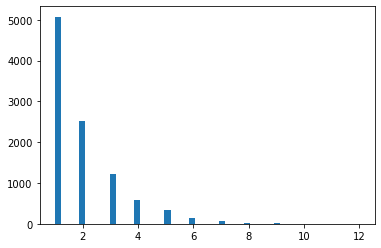

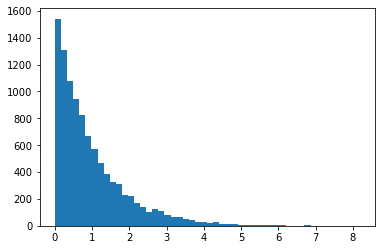

In [95]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib, bins=50)
plt.show()

## Adding a transformer in the preparation pipeline to select only the most important attributes.

In [96]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

Note: this feature selector assumes that you have already computed the feature importances somehow (for example using a `RandomForestRegressor`). You may be tempted to compute them directly in the `TopFeatureSelector`'s `fit()` method, however this would likely slow down grid/randomized search since the feature importances would have to be computed for every hyperparameter combination (unless you implement some sort of cache).

Let's define the number of top features we want to keep:

In [97]:
k = 5

In [98]:
# feature_importances

Now let's look for the indices of the top k features:

In [99]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 3, 11, 12, 15, 25], dtype=int64)

In [100]:
# np.array(attributes)[top_k_feature_indices]

Let's double check that these are indeed the top k features:

In [101]:
attributes

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

In [102]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.05069440608838373, 'GarageCars'),
 (0.03402518462466037, 'TotalBsmtSF'),
 (0.02586877282971681, 'TotRmsAbvGrd'),
 (0.024826168205939858, '1stFlrSF'),
 (0.01838496315998734, 'GrLivArea')]

# Submission

In [103]:
t=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
Df = pd.DataFrame({'Id':t['Id'].apply(int), 'SalePrice':(final_predictions)})

In [104]:
Df.to_csv('submission.csv', index=False)

In [105]:
Df

,Id,SalePrice
0,1461,123532.101562
1,1462,162131.515625
2,1463,175391.968750
3,1464,188551.203125
4,1465,196894.000000
...,...,...
1454,2915,84018.195312
1455,2916,78583.406250
1456,2917,162291.875000
1457,2918,121640.835938


# y_true

In [106]:
y_best = pd.read_csv("../input/house-prices-advanced-regression-techniques/result-with-best.csv",index_col='Id')

In [107]:
y_true = y_best["SalePrice"].to_numpy() 

In [108]:
final_predictions

array([123532.1  , 162131.52 , 175391.97 , ..., 162291.88 , 121640.836,
       232310.06 ], dtype=float32)

In [109]:
final_mse = mean_squared_error(y_true, final_predictions)
final_rmse = np.sqrt(final_mse)

In [110]:
final_rmse

22203.31467602123

In [111]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_true, final_predictions)

0.017850866233332034

In [112]:
final_model = rnd_search.best_estimator_

In [113]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("final_model", final_model)
    ])

# Training
full_pipeline_with_predictor.fit(housing_tr, housing_labels)
# Testing
final_predictions = full_pipeline_with_predictor.predict(X_test)

In [114]:
final_mse = mean_squared_error(y_true, final_predictions)
final_rmse = np.sqrt(final_mse)

In [115]:
final_rmse

26342.5358234848

In [116]:
from sklearn.metrics import mean_squared_log_error
t2mse = mean_squared_log_error(y_true, final_predictions)
t2_rmse = np.sqrt(t2mse)
t2_rmse

0.159989376435814

In [117]:
# t2mse = mean_squared_log_error(y_true, final_predictions)
# t2_rmse = np.sqrt(t2mse)
# t2_rmse

In [118]:
# t3mse = mean_squared_log_error(y_true, final_predictions)
# t3_rmse = np.sqrt(t3mse)
# t3_rmse